In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Issue:
Accidently deleted my cvs file in Cloud Object Storage (COS). 
## Solution:
REF: https://developer.ibm.com/tutorials/ibm-cloud-object-storage-usage-ibm-datascience-experience/
Trying the code found at the above 

In [2]:
import ibm_boto3
from botocore.client import Config

def get_file(creds, filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=creds['BUCKET'], Key=filename)['Body']
    return fileobject

In [3]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-a1273c93-34b7-4078-a55d-3a56b1f3911c',
    'IBM_API_KEY_ID': 'q2oBxlBLT2pIRSjM0ra7WrLhLDvHi6qco1LSvWz6Ms5F',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'speedtest-donotdelete-pr-xra6wuir8nxwic',
    'FILE': 'kl2-runst.log'
}

In [4]:
cos = ibm_boto3.client('s3',
                       ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                       config=Config(signature_version='oauth'),
                       endpoint_url=credentials_1['ENDPOINT'])
file_obj = get_file(credentials_1, credentials_1['FILE'])
file_obj

In [5]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='468e3940-1683-4566-a27d-4f002fb9ed5d', project_access_token='p-90020b8554784790592bca737622d5674020e767')
#pc = project.project_context
#
#print('Project Name: {0}'.format(project.get_name()))
#print('Project Description: {0}'.format(project.get_description()))
#print('Project Bucket Name: {0}'.format(project.get_project_bucket_name()))
#print('Project Assets (Connections): {0}'.format(project.get_assets()))
#
# project.get_files()
# Out: [{'name': 'kl2-runst.log', 'asset_id': 'a36d4753-1fe7-4d3a-b7d8-833feab59c34'}]
#
#CSV_FILE = project.get_file('kl2-runst.log')
#file_obj = CSV_FILE[0]
#file_stream = file_obj['file_content']
# pd.read_csv(file_stream, nrows=10)
#

In [6]:
RAW_COLS1 = [ 'timestamp', 'host','isp1', 'isp2', 'distance', 'dim1', 'latency','dl-speed', 'dim2', 'up-speed', 'dim3' ]
RAW_COLS2 = [ 'timestamp', 'host', 'distance', 'latency','dl-speed', 'up-speed' ]

In [7]:
df = pd.read_csv(file_obj, header=None, usecols=[0,1,4,6,7,9], names=RAW_COLS2)
df.columns

Index(['timestamp', 'host', 'distance', 'latency', 'dl-speed', 'up-speed'], dtype='object')

In [8]:
df.timestamp = df.timestamp.str.slice(0, 10)
df.head(10)

,timestamp,host,distance,latency,dl-speed,up-speed
0,2019-07-11,kwrlinux2,68.85,53.789,27.14,73.08
1,2019-07-11,kwrlinux2,104.21,42.780,55.88,74.59
2,2019-07-11,kwrlinux2,104.21,21.845,63.75,87.59
3,2019-07-11,kwrlinux2,104.21,25.485,56.18,70.81
4,2019-07-11,kwrlinux2,111.03,32.346,28.47,74.18
5,2019-07-11,kwrlinux2,111.03,28.192,38.22,89.58
6,2019-07-11,kwrlinux2,111.03,30.715,21.53,77.46
7,2019-07-11,kwrlinux2,104.21,27.000,69.32,87.53
8,2019-07-11,kwrlinux2,104.21,21.536,55.40,78.57
9,2019-07-11,kwrlinux2,104.21,21.464,92.61,92.91


In [9]:
df.timestamp = df.timestamp.str.slice(0, 10)

In [10]:
only2019 = df.loc[df.timestamp.str.startswith('2019', na=False)]
only2019.head(10)

,timestamp,host,distance,latency,dl-speed,up-speed
0,2019-07-11,kwrlinux2,68.85,53.789,27.14,73.08
1,2019-07-11,kwrlinux2,104.21,42.780,55.88,74.59
2,2019-07-11,kwrlinux2,104.21,21.845,63.75,87.59
3,2019-07-11,kwrlinux2,104.21,25.485,56.18,70.81
4,2019-07-11,kwrlinux2,111.03,32.346,28.47,74.18
5,2019-07-11,kwrlinux2,111.03,28.192,38.22,89.58
6,2019-07-11,kwrlinux2,111.03,30.715,21.53,77.46
7,2019-07-11,kwrlinux2,104.21,27.000,69.32,87.53
8,2019-07-11,kwrlinux2,104.21,21.536,55.40,78.57
9,2019-07-11,kwrlinux2,104.21,21.464,92.61,92.91


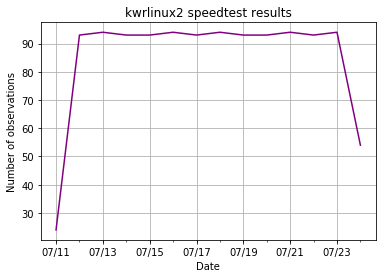

In [11]:
# t = only2019.groupby(only2019['timestamp']).size().plot()
t = only2019.groupby(only2019['timestamp']).size()
t.index = pd.to_datetime(t.index)
#####
##### https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
# Define the date format
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Need the follow because plot gave a warning about something becoming deprecated.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
myFmt = DateFormatter("%m/%d") 

# plot the data
fig, ax = plt.subplots()
ax.plot(t.index, 
       t.values,
       color='purple')
ax.set(xlabel="Date", ylabel="Number of observations")
ax.set(title="kwrlinux2 speedtest results")
ax.grid()

# tell matplotlib to use the format specified above
ax.xaxis.set_major_formatter(myFmt) 
ax.xaxis.set_minor_locator(mdates.DayLocator())


In [12]:
only2019.groupby(only2019['timestamp']).size()

timestamp
2019-07-11    24
2019-07-12    93
2019-07-13    94
2019-07-14    93
2019-07-15    93
2019-07-16    94
2019-07-17    93
2019-07-18    94
2019-07-19    93
2019-07-20    93
2019-07-21    94
2019-07-22    93
2019-07-23    94
2019-07-24    54
dtype: int64